In this notebook we perform data exploration for the Glassdoor salary dataset:
https://glassdoor.app.box.com/v/gender-pay-data

First I'll load the libs needed for exploration.

In [3]:
# Dataframe management
import warnings
import matplotlib.pyplot as plt
import pandas as pd

# Numerical computation
import numpy as np

# visualization library
import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set_context(rc={
    "font.family": 'sans',
    "font.size": 24,
    "axes.titlesize": 24,
    "axes.labelsiza": 24
})

# import matplotlib and allow it to plot inline
%matplotlib inline

# ignore warnings
warnings.filterwarnings("ignore")


Let's load the Glassdoor salary dataset

## The dataset

In [4]:
dataset  = pd.read_csv(r'./data.csv')
print('Glassdoor salaries dataset\n---------------------------\n')
print('Dataset characteristics\n-----------------------\n')

print(f'Number of instances: {len(dataset)}')
print(f'Number of attributes: 8  predictive attributes (2 numerical, 4 categorical, 2 ordinal) and the target variable')

print('Attribute information:')

print('jobTitle: the job titles of the employees - ', pd.unique(dataset['jobTitle']))
print('gender: the gender of the employees', pd.unique(dataset['gender']))
print('age: the age of the employees')
print(f'perfEval: the performance evaluation of the employees, from {dataset["perfEval"].min()} to {dataset["perfEval"].max()}')
print('edu: the educational level of the employees - ', pd.unique(dataset['edu']))
print('dept: the department that the employee is working on - ', pd.unique(dataset['dept']))
print(f'seniority: the seniority level of an employee, from {dataset["seniority"].min()} to {dataset["seniority"].max()}')
print('basePay: the base salary of the employee')
print('bonus: the bonus an employee will get based on the other attributes, this is our target variable')

print('Summary statistics:')
pd.set_option('display.precision', 2)
dataset.describe()


Glassdoor salaries dataset
---------------------------

Dataset characteristics
-----------------------

Number of instances: 1000
Number of attributes: 8  predictive attributes (2 numerical, 4 categorical, 2 ordinal) and the target variable
Attribute information:
jobTitle: the job titles of the employees -  ['Graphic Designer' 'Software Engineer' 'Warehouse Associate' 'IT'
 'Sales Associate' 'Driver' 'Financial Analyst' 'Marketing Associate'
 'Data Scientist' 'Manager']
gender: the gender of the employees ['Female' 'Male']
age: the age of the employees
perfEval: the performance evaluation of the employees, from 1 to 5
edu: the educational level of the employees -  ['College' 'PhD' 'Masters' 'High School']
dept: the department that the employee is working on -  ['Operations' 'Management' 'Administration' 'Sales' 'Engineering']
seniority: the seniority level of an employee, from 1 to 5
basePay: the base salary of the employee
bonus: the bonus an employee will get based on the other attr

,age,perfEval,seniority,basePay,bonus
count,1000.00,1000.00,1000.00,1000.00,1000.00
mean,41.39,3.04,2.97,94472.65,6467.16
std,14.29,1.42,1.40,25337.49,2004.38
min,18.00,1.00,1.00,34208.00,1703.00
25%,29.00,2.00,2.00,76850.25,4849.50
50%,41.00,3.00,3.00,93327.50,6507.00
75%,54.25,4.00,4.00,111558.00,8026.00
max,65.00,5.00,5.00,179726.00,11293.00


In [5]:
print('Summarizing categorical values')
dataset.describe(include=object)

Summarizing categorical values


,jobTitle,gender,edu,dept
count,1000,1000,1000,1000
unique,10,2,4,5
top,Marketing Associate,Male,High School,Operations
freq,118,532,265,210


Missing values: None

Let's start by separating the numerical variables from the categorical ones, and specifying the target and input variables

In [6]:
numericalVariables = ['age', 'perfEval', 'seniority', 'basePay', 'bonus']
categoricalVariables = ['jobTitle', 'gender', 'edu', 'dept']

targetVariable = 'bonus'
inputVariables = dataset.columns[dataset.columns != targetVariable]

Let's get some statistics about continuous attributes

In [7]:
dataset.describe()

,age,perfEval,seniority,basePay,bonus
count,1000.00,1000.00,1000.00,1000.00,1000.00
mean,41.39,3.04,2.97,94472.65,6467.16
std,14.29,1.42,1.40,25337.49,2004.38
min,18.00,1.00,1.00,34208.00,1703.00
25%,29.00,2.00,2.00,76850.25,4849.50
50%,41.00,3.00,3.00,93327.50,6507.00
75%,54.25,4.00,4.00,111558.00,8026.00
max,65.00,5.00,5.00,179726.00,11293.00


## Exploring the data
We need to understand how the data in this dataset relate to the bonus applied to the employee.

Before we can do that, we need to first understand our variables. Let's start with the numerical ones, specifically our target variable, bonus.

Let's see what values our variable can take, as well as the distribution and dispersion, by plotting it with an histogram.

[Text(0.5, 0, 'Bonus'), Text(0, 0.5, 'count')]

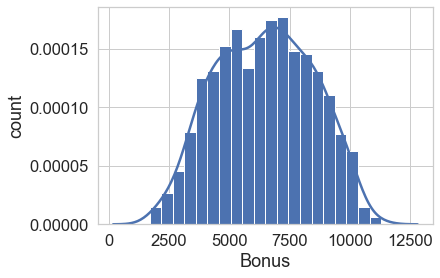

In [8]:
sns.set_style(style='whitegrid')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5, "figure.figsize": [8, 5]})
sns.distplot(
	dataset[targetVariable],
	norm_hist = False,
	kde = True,
	bins = 20,
	hist_kws = { "alpha": 1 }
).set(xlabel = 'Bonus', ylabel = 'count')

Looking at this plot we can see that few employees are receiving a bonus below 4000, most of them a getting between 4000 and 8000 and a very few employees are getting more that 10000.

Let's get some insights on the other numerical variables

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'perfEval'}>,
        <AxesSubplot:title={'center':'seniority'}>,
        <AxesSubplot:title={'center':'basePay'}>],
       [<AxesSubplot:title={'center':'bonus'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

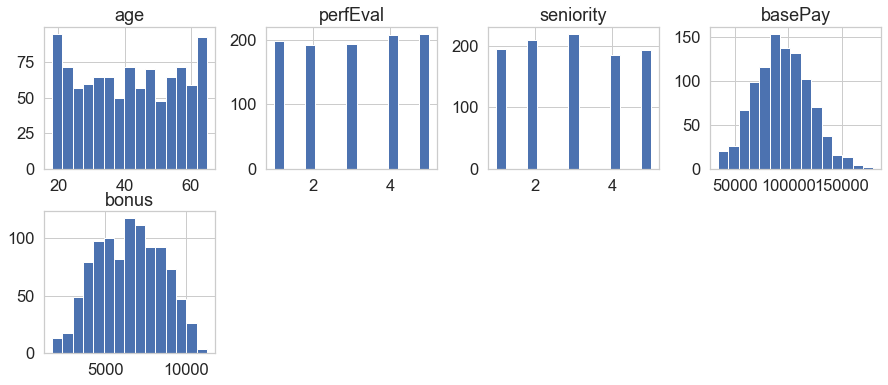

In [9]:
dataset[numericalVariables].hist(bins=15, figsize=(15, 6), layout=(2, 4))


We can see that the ages with the most employees are placed among 20's and above 60y/o, the rest of them are sort of balanced. The performance evaluation and seniority levels are also balanced with the number of employees. Finally at base pay we can see that most of them are getting between 80000 and 110000 and a very few of them are getting more than 150000.

performance e idade | performance e bonus

In [10]:
dataset['age_group'] = dataset['age']
def getGroup(age):
	if age < 30:
		return 'young'
	if age < 45:
		return 'mid-age'
	return 'old'

dataset['age_group'] = [getGroup(age) for age in dataset['age_group']]


<function matplotlib.pyplot.show(close=None, block=None)>

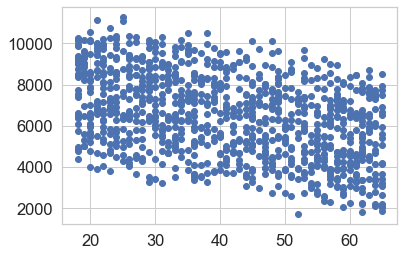

In [11]:
##sns.barplot(x=dataset['age_group'], y=dataset['perfEval'])
# add labels
plt.scatter(x=dataset['age'], y=dataset['bonus'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

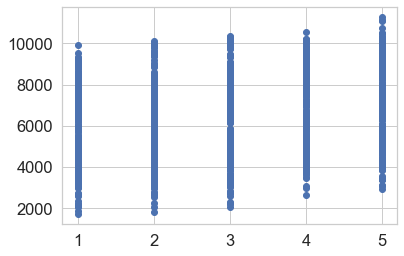

In [12]:
# Senioridade e bonus
plt.scatter(x=dataset['seniority'],  y=dataset['bonus'])
plt.show

Now let's get a look at the categorical variables.

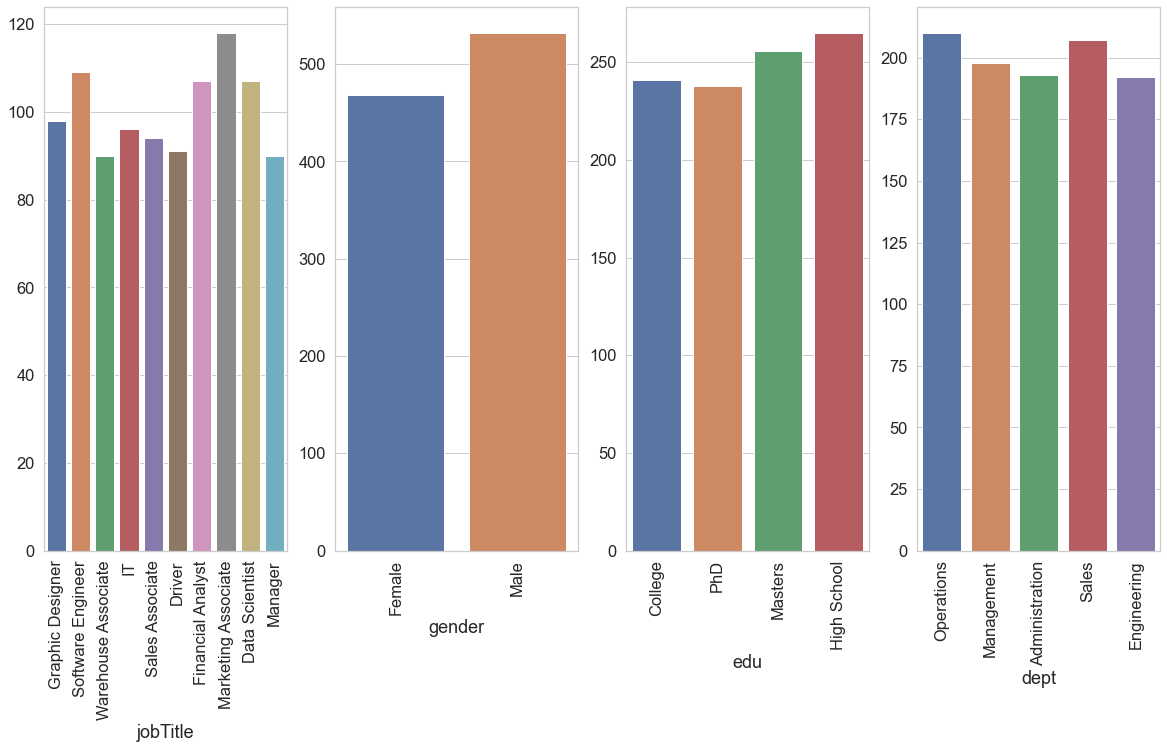

In [13]:
fig, ax = plt.subplots(1, 4, figsize=(20, 10))
for variable, subplot in zip(categoricalVariables, ax.flatten()):
	sns.countplot(dataset[variable], ax=subplot).set(ylabel='')
	for label in subplot.get_xticklabels():
		label.set_rotation(90)

correlacao
converter categoricos para numericos


In [14]:
# Transformando em numericos
numData = pd.get_dummies(dataset, columns=categoricalVariables, drop_first=True)
numData.head()

,age,perfEval,seniority,basePay,bonus,age_group,jobTitle_Driver,jobTitle_Financial Analyst,jobTitle_Graphic Designer,jobTitle_IT,...,jobTitle_Software Engineer,jobTitle_Warehouse Associate,gender_Male,edu_High School,edu_Masters,edu_PhD,dept_Engineering,dept_Management,dept_Operations,dept_Sales
0,18,5,2,42363,9938,young,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,21,5,5,108476,11128,young,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0
2,19,4,5,90208,9268,young,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,20,5,4,108080,10154,young,0,0,0,0,...,1,0,1,0,1,0,0,0,0,1
4,26,5,5,99464,9319,young,0,0,1,0,...,0,0,1,0,1,0,1,0,0,0


In [ ]:
# Correlational analysis
